In [340]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("Car_sales1.csv", delimiter=";") 
print (df.head())

  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       RL               8.588               29.725    Passenger   
3         Audi       A4              20.397               22.255    Passenger   
4         Audi       A6              18.780               23.555    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8         140      101.2   67.3   172.4   
1               28.40          3.2         225      108.1   70.3   192.9   
2               42.00          3.5         210      114.6   71.4   196.6   
3               23.99          1.8         150      102.6   68.2   178.0   
4               33.95          2.8         200      108.7   76.1   192.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency  
0      

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    int64  
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 12.9+ KB


In [342]:
df= pd.get_dummies(df)

df = df.astype(int)

In [343]:
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Model_Tacoma,Model_Taurus,Model_Town car,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Vehicle_type_Car,Vehicle_type_Passenger
0,16,16,21,1,140,101,67,172,2,13,...,0,0,0,0,0,0,0,0,0,1
1,39,19,28,3,225,108,70,192,3,17,...,0,0,0,0,0,0,0,0,0,1
2,8,29,42,3,210,114,71,196,3,18,...,0,0,0,0,0,0,0,0,0,1
3,20,22,23,1,150,102,68,178,2,16,...,0,0,0,0,0,0,0,0,0,1
4,18,23,33,2,200,108,76,192,3,18,...,0,0,0,0,0,0,0,0,0,1


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Columns: 155 entries, Sales_in_thousands to Vehicle_type_Passenger
dtypes: int32(155)
memory usage: 71.0 KB


In [345]:
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Model_Tacoma,Model_Taurus,Model_Town car,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Vehicle_type_Car,Vehicle_type_Passenger
0,16,16,21,1,140,101,67,172,2,13,...,0,0,0,0,0,0,0,0,0,1
1,39,19,28,3,225,108,70,192,3,17,...,0,0,0,0,0,0,0,0,0,1
2,8,29,42,3,210,114,71,196,3,18,...,0,0,0,0,0,0,0,0,0,1
3,20,22,23,1,150,102,68,178,2,16,...,0,0,0,0,0,0,0,0,0,1
4,18,23,33,2,200,108,76,192,3,18,...,0,0,0,0,0,0,0,0,0,1


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Columns: 155 entries, Sales_in_thousands to Vehicle_type_Passenger
dtypes: int32(155)
memory usage: 71.0 KB


In [347]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [348]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression

# Cargar los datos desde el archivo CSV
data = pd.read_csv("Car_sales1.csv")

# Separar las características (X) y la variable objetivo (y)
X = df[['Price_in_thousands', 'Engine_size','Manufacturer_Audi', 'Vehicle_type_Car', 'Manufacturer_BMW', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge',
            'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep',
            'Manufacturer_Mercedes-B', 'Manufacturer_Mitsubishi', 'Manufacturer_Nissan', 'Manufacturer_Plymouth',
            'Manufacturer_Porsche', 'Manufacturer_Toyota', 'Manufacturer_Acura', 'Manufacturer_Cadillac', 'Model_3000GT', 'Model_328i',
            'Model_Voyager', 'Model_TL', 'Model_Sentra', 'Model_Sable', 'Model_SL-Class', 'Model_SL', 'Model_Ranger', 'Model_Ram Wagon', 'Model_Ram Pickup',
            'Model_Prizm', 'Model_Passat', 'Model_Neon', 'Model_Mirage', 'Model_Maxima', 'Model_Malibu', 'Model_LeSabre', 'Model_Jetta',
            'Model_Integra' , 'Model_Grand Prix', 'Model_Grand Marquis', 'Model_Grand Cherokee', 'Model_Grand Am', 'Model_Galant', 'Model_F-Series',
            'Model_Explorer', 'Model_Elantra', 'Model_Caravan', 'Model_Camry'
            
]]
y = df['Sales_in_thousands']


# Inicializar el modelo de regresión lineal
model = LinearRegression()


## Método 1: K-Fold Cross-Validation

In [349]:

k = 20
# Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []



fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

   

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados
plt.show()

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print(mse_scores)

#k=3  4254.976
#k=5  4316.263
#k=10 4484.234
#k=15 4624.793
#k=20 4365.969

<Figure size 640x480 with 0 Axes>

MSE promedio para K-Fold CV: 4365.969462538041
[261.2867419346617, 2334.3717895273044, 3103.6862108239097, 2280.9923769056336, 9602.151115314635, 729.8017446943485, 2238.991201689177, 878.3130502399787, 5885.645174112578, 5477.140021980896, 704.6425884729232, 1660.608954879892, 5713.516719948161, 2227.1988830812465, 329.9393918815559, 1152.4058319791664, 33770.25403385772, 2062.3117524469067, 4245.58830714649, 2660.5433598436057]


#### El valor de K que mejor resultado nos proporciona es con k=3, pues es el que menor MSE promedio proporciona

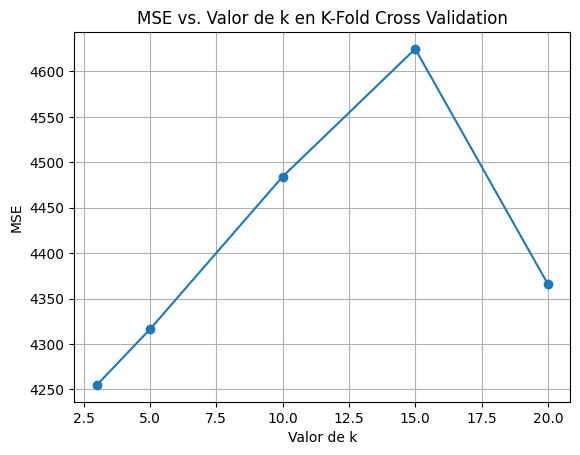

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Supongamos que X e y ya están definidos

# Configurar el modelo (supongo que ya está definido como en tu código original)
model = LinearRegression()

# Lista de valores de k que deseas probar
k_values = [3, 5, 10, 15, 20]

# Listas para almacenar los MSE promedio para cada valor de k
mean_mse_values = []

for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    # Lista para almacenar los MSE de cada pliegue
    mse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)

    # Calcular el MSE promedio para este valor de k
    mean_mse = np.mean(mse_scores)
    mean_mse_values.append(mean_mse)

# Graficar los resultados
plt.plot(k_values, mean_mse_values, marker='o')
plt.title('MSE vs. Valor de k en K-Fold Cross Validation')
plt.xlabel('Valor de k')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


*En terminos generales el k=3 es la mejor escenario que podemos obtener. Sin embargo, hay que reconocer que los valores en general son muy altos, pues todos estan por encima de los 4000, esto indicando que el modelo no cuenta con tanta precision para predecir la variable de ventas


### Metodo 2: Leave-one-out

In [351]:
# Método 2: Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
num_rows = X.shape[0]
num_cols = 4  # Visualizar las gráficas de tres en tres

# Calcular el número de filas y columnas para la visualización
num_rows_display = num_rows // num_cols + int(num_rows % num_cols > 0)


fold = 1
mse_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)
    
# Calcular el MSE promedio para LOOCV
mean_mse_loocv = np.mean(mse_scores)


print(f"MSE promedio para LOOCV: {mean_mse_loocv}")    

MSE promedio para LOOCV: 4365.969462538041


### ¿Cual es el mejor modelo?
En este caso el mejor modelo se obtiene con el metodo 1 ya que con el valor de k=3 podemos obtener un valor de MSE menor a comparacion del que se obtiene con el segundo metodo. Ademas, el refinamiento de las variables se hizo con el fin de de abarcar la mayor cantidad de subcategorias ed cada variable categorica, por lo que despues de transformar las variables categoricas en numericas, se tomaron en cuenta solamente las que mas se repetian y las que mas aportaban al modelo. Por esto, se puede decir que el refinamiento si es correcto

### ¿Que decision tomaria?
Teniendo en cuenta los datos, la marca de autos que mas aporta en las ventas en este caso es Honda, por lo que la decision correcta sera como consecionario ofrecer una mayor cantidad de modelos de autos Honda para los clientes

### Bibliografia: https://www.kaggle.com/datasets/gagandeep16/car-sales